In [1]:
import numpy as np 
import matplotlib.pyplot as plt 

### FTCS method 

In [26]:
def GS_laplase( v , tor = 1e-6 ):
    iter = 0 
    n = v.shape[0]
    max_del = 10 
    while max_del > tor :
        max_del = 0  
        for i in range( 1 , n - 1 ): 
            for j in range( 1 , n -1 ):
                old = v[i,j]
                v[i,j] = (0.25)*(v[i+1,j]+v[i-1,j]+v[i,j+1]+v[i,j-1])
                del_ = abs( v[i,j] - old )
                if max_del < del_: 
                    max_del = del_ 
        iter += 1
    print( f'total number of iteration : {iter}') 
    return v 

In [27]:
# define initial v: 
v = np.zeros( (101 , 101 ))
v[ -1 , : ] = np.ones(101)
print( v , v.shape )

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 1. 1. ... 1. 1. 1.]] (101, 101)


In [28]:
v  = GS_laplase( v )

total number of iteration : 6095


In [29]:
x = np.linspace( 0 , 1 , 101 )
y = np.linspace( 0 , 1 , 101 )
X , Y = np.meshgrid( x , y )

1.0


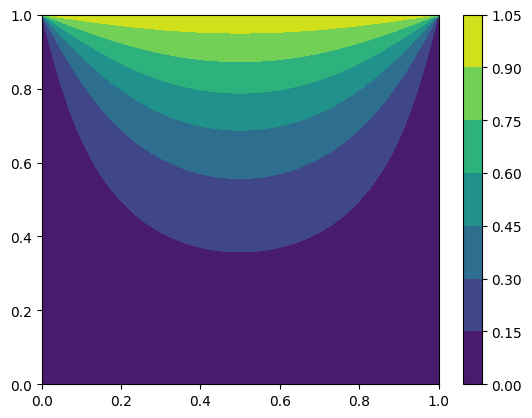

In [30]:
plt.contourf( X , Y , v )
plt.colorbar() ; 
print( np.max( v ))

### using the FTCS method! 

In [ ]:
w0 = 2*np.pi/365 
t0 = lambda t : 10 + 12*np.sin(w0*t)

dx = 0.1 
x0 = np.arange( 0 , 20 , dx  )
dt = 1/30 


def ftcs( dt , years , x0 , xn , dx , T0  , D ): 
    t = np.arange( 0 , 365 , dt )
    T = np.zeros( (t.size , T0.size ))
    r = D*dt/(dx**2)
    if r >= 1/2 : 
        raise ValueError('r is grater than 1/2')
    for _ in range( 9 ):
        for time in range( 1 , len(t) ): 
            T[time , 0] = t0( time )
            T[time , -1 ] = 11 
            T[time , 1:-1] =  T[time -1 , 1:-1] + r*(T[time -1 , 2:] + T[time -1 , 0:-2] -2*T[time - 1 , 1:-1])
        T[time ]

In [33]:
x = np.array([1 , 2, 3, 4, 5, 6, 7])
x[1:-1]
x[:-2]

array([1, 2, 3, 4, 5])